In [46]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Applying CRIPS-DM Methodology to a Business Problem

## Dataset 1 - Predicting Customer Churn in the Telecomunication Provider

## 1. Business Understanding

### Business Objectives

In the telecomunications industry, holding onto customers is a make-or-break deal. It's like trying to keep water in a leaky bottle. If we're losing customers faster than we're gaining new ones, it's a problem. Suppose we're pouring water into a bottle, but there're leaking out from the bottom, our bottle will never got filled. To ensure a long-term success in our business(in this case, the telecommunication provider), we need to take customer retention seriously and act on it.

Predicting and dealing with customer churn is a big deal. It's all about figuring out which customers might leave our service and taking action to prevent that from happening. We're curious about things like, "Do customers who have international charges ten to leave more often?" or "Are customers who have been with us for a certain time more likely to stick arond and not leave?" These questions we're aiming to answer, to understand the reasons behind customer churn and come up with the effective strategies to keep our business thriving.

#### Business Success Criteria

The success of our project is to achieving accurate predictions of customer churn within the telecomunication industry. The primary objective is to develop a predictive model that effectively identifies whether a customer is likely to stop using our servies. There are some criteria that need to be considerd:

1. **Predictive Accuracy:** Our model must be able to achieve a high level of accuracy in distinguishing between customers who are likely to churn and those who are not.  

2. **Minimizing False Negatives and False Positives:** While overall accuracy is crucial, it's essential to consider to minimize both false negatives and false positives. In our case, false positives is when failing to predict churn when it occurs, and false negatives is predicting a customer will churn when they do not. Balancing the trade-off between these two aspects will ensure that our model give an actionable insights that can be use in a business case while avoiding any undue concerns.

3. **Interpretability and Insights:** A meaningful outcomes is the ability to derive any insights from the model. Our goal is to understand any factors and features that may contribute to customer churn, and this understanding can help us to informed any business decisions and implements targeted strategies.

4. **Generalizability:** The model's should be able to capture an unseen data. We should ensures that our predictions will remain robust and reliable even when applied to real-world scenarios.

5. **Impact on Customer Retention:** Undoubtly, the criteria of business relies on our model's ability to drive postive outcomes for the business. Suppose the model accurately identifies customers churning, we need to use any appropiate countermeasures to retain them, whether to bolstering customer loyalty and maintaining customer satisfaction for a long term business sustainability.


### Assess Situation

#### Inventory of Resources

- **Personnel:** We may need to access business experts who understand the infrastructure of the telecom industry. 

- **Data:** Our dataset comprises of 4250 samples with 19 features, and one target variable ('churn'). The data is obtained from the kaggle competition. (https://www.kaggle.com/competitions/customer-churn-prediction-2020/overview/description)

- **Computing Resources:** For computing resources, we utilized my local machine, specifically the Macbook Air M1. This served as the primary machine for running the project and conducting analysis.

- **Software:** To streamline our project workflow and create an effective development environment, we employed a combination of tools. We started by using cookiecutter data science template (https://github.com/drivendata/cookiecutter-data-science), which provided a structured project framework. For managing Python versions and setting up the specify environment, we relied on 'pyenv', ensuring compatibility with Python 3.9.13. Additionally, we utilized 'Poetry', a dependency management tool, to create and manage our project's virtual environment. This combination of software tools facilitated a seamless and organized approach to developing our project.

#### Requirements, Assumptions, and Constraints

- **Requirements:** The project's timeline should aligns with the business's goals (2 weeks). The results must be comprehensible and reliable, and we will ensure our project lied under a legal compliance.

- **Assumptions:** We will assume that the data have reflects the customer behavior effectively. Moreover, we need to acknowledge assumptions bases on the business context.

- **Constraints:** We'll work within resource limitations, the availability of personnel and the practicality of data size for modeling.

#### Risk and Contingencies

- **Data Quality:** Inaccurate or missing data might lead to biased predictions. Proper countermeasure like data cleaning, handling missing values, and outlier detection need to be consider.

- **Imbalanced Dataset:** The class distribution of the target variable in our dataset might be imbalanced, meaning that one class (churned or not churned) significantly outnumbers the other. This can lead to biased predictions, where the model will always predict the majority class more frequently. There are many techniques to handle with the imbalanced data, such as oversampling the minority class, undersampling the majority class, or using synthetic data generation methods like SMOTE (Synthetic Minority Over-sampling Technique).

- **Model Overfitting:** Building a predictive models, there's a risk of overfitting, where the model learns to perform well on the training data but struggles to generalize to an unseen data. Hyperparameter tunning and regularization techniques such as L1 and L2 can counter the risk.

- **Other Technical Challenges**: Unexpected technical issues can arise during the project, impacting our progress and outcomes. We will maintain open communication with the project coordinator.

#### Terminology

- **Business Terminology:** Understanding terms like "churn", "international plan", and "voicemail plan" is essential to interpret business needs.

- **Data Mining and Modeling Terminology:**: Terms like "Feature Engineering", "AUCROC", "Hyperparameter Tuning" must be well-defined for an effective communications.

#### Cost and Benefits

### Data Mining Goals

Our primary data mining goal is to develop a predictive model that accurately identifies customers who are likely to churn. This invovles utilizing the dataset to train and validate a machine learning algorithm that capable of classifying a binary classification.

#### Data Mining Success Criteria

Given the imbalanced nature of our dataset, using only accuracy as a performance metrics might be misleading. Therefore, our success criteria will focus on achieving a balance between precision and recall, specifically targeting the minority class (churned customers).

- **Precision and Recall:** Our goal is to achieve a high precision for predicting churned customers, which will minimizes false positives, ensuring that when our model predicts a customer will churn, it's accurate. In addition, we also want to have a high recall, minimizing false negatives, ensuring that our model identifies as many actual churned customers as possible.

- **F1-Score:** We will use F1-Score, which combines both precision and recall, to provide a balanced mearsure of the model's performance.

- **AUC-ROC:** The AUC-ROC score provides insight into the model's abilitiy to discriminate between the positive and negative classes across different thresholds. A higher AUC-ROC indicates a better performing model.

- **Feature Importance:** Feature importance will guide us in understanding which features have the most significant impact on our target variables.

## 2. Data Understanding

## Load and Explore the Dataset

Import the pandas and numpy package

In [47]:
import pandas as pd
import numpy as np

Load the dataset into a dataframe called df

In [48]:
df = pd.read_csv('../data/raw/customer-churn-prediction-2020.csv')

Display the first 5 rows of df

In [49]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


Display the dimensions (shape) of df

In [50]:
df.shape

(4250, 20)

Display the summary (info) of df

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

Display the descriptive statistics of df

In [52]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Display the total missing values of df

In [53]:
df.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

There is no missing values in the df

Display the duplicated values in the df

In [54]:
df.duplicated().sum()

0

There is no duplicated values in the df

 Our dataset contains a total of 4250 rows, with 19 feature varaible, and one target variable ('churn'). Notably, there are no missing and duplicated values within the dataset, and can be categorized as follow:
 
- **state**: *object*, 2-letter code of the US State of customer residence.
- **account_length**: *int64*, Number of months the customer has been with the current telco provider.
- **area_code**: *object*, 3 digit area code.
- **international_plan**: *object*, Whether the customer has the international plan.
- **voice_mail_plan**: *object*, Whether the customer has the voice mail plan.
- **number_vmail_messages**: *int64*, Number of voice mail messages.
- **total_day_minutes**: *int64*, Total minutes of day calls.
- **total_day_calls**: *int64*, Total number of day calls.
- **total_day_charge**: *int64*, Total charge of day call.
- **total_eve_minutes**: *int64*, Total minutes of evening calls.
- **total_eve_calls**: *int64*, Total number of evening calls.
- **total_eve_charge**: *int64*, Total charge of evening calls.
- **total_night_minutes**: *int64*, Total minutes of night calls.
- **total_night_calls**: *int64*, Total number of night calls.
- **total_night_charge**: *int64*, Total charge of night calls.
- **total_intl_minutes**: *int64*, Total minutes of international calls.
- **total_intl_calls**: *int64*, Total number of international calls.
- **total_intl_charge**: *int64*, Total charge of international calls.
- **number_customer_service_calls**: *int64*, Number of calls to the Customer Services of the provider.
- **churn**: *object*, Target variable.


## 3. Data Preparation

Create a copy of df and assigned it into a variable called df_cleaned

In [55]:
df_cleaned = df.copy()

We will categorize our data in two types: categorical and numerical columns. This distinction will help us apply appropriate preprocessing techniques to each type of data.

### Cateogorical Columns

We will extract the categorical columns from our df.

In [56]:
cat_cols = [feature for feature in df_cleaned.columns if df_cleaned[feature].dtypes=='O']

In [57]:
num_cols = [feature for feature in df_cleaned.columns if df_cleaned[feature].dtypes!='O']

In [58]:
cat_cols

['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']

The following columns fall under the categorical category:

- **state:** 2-letter code of the US State of customer residence.
- **area_code:** 3-digit area code.
- **international_plan:** Whether the customer has the international plan.
- **voice_mail_plan:** Whether the customer has the voice mail plan.
- **churn:** Target variable indicating whether a customer has churned.

Import matplotlib and seaborn package

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
palette = 'ch:.25'

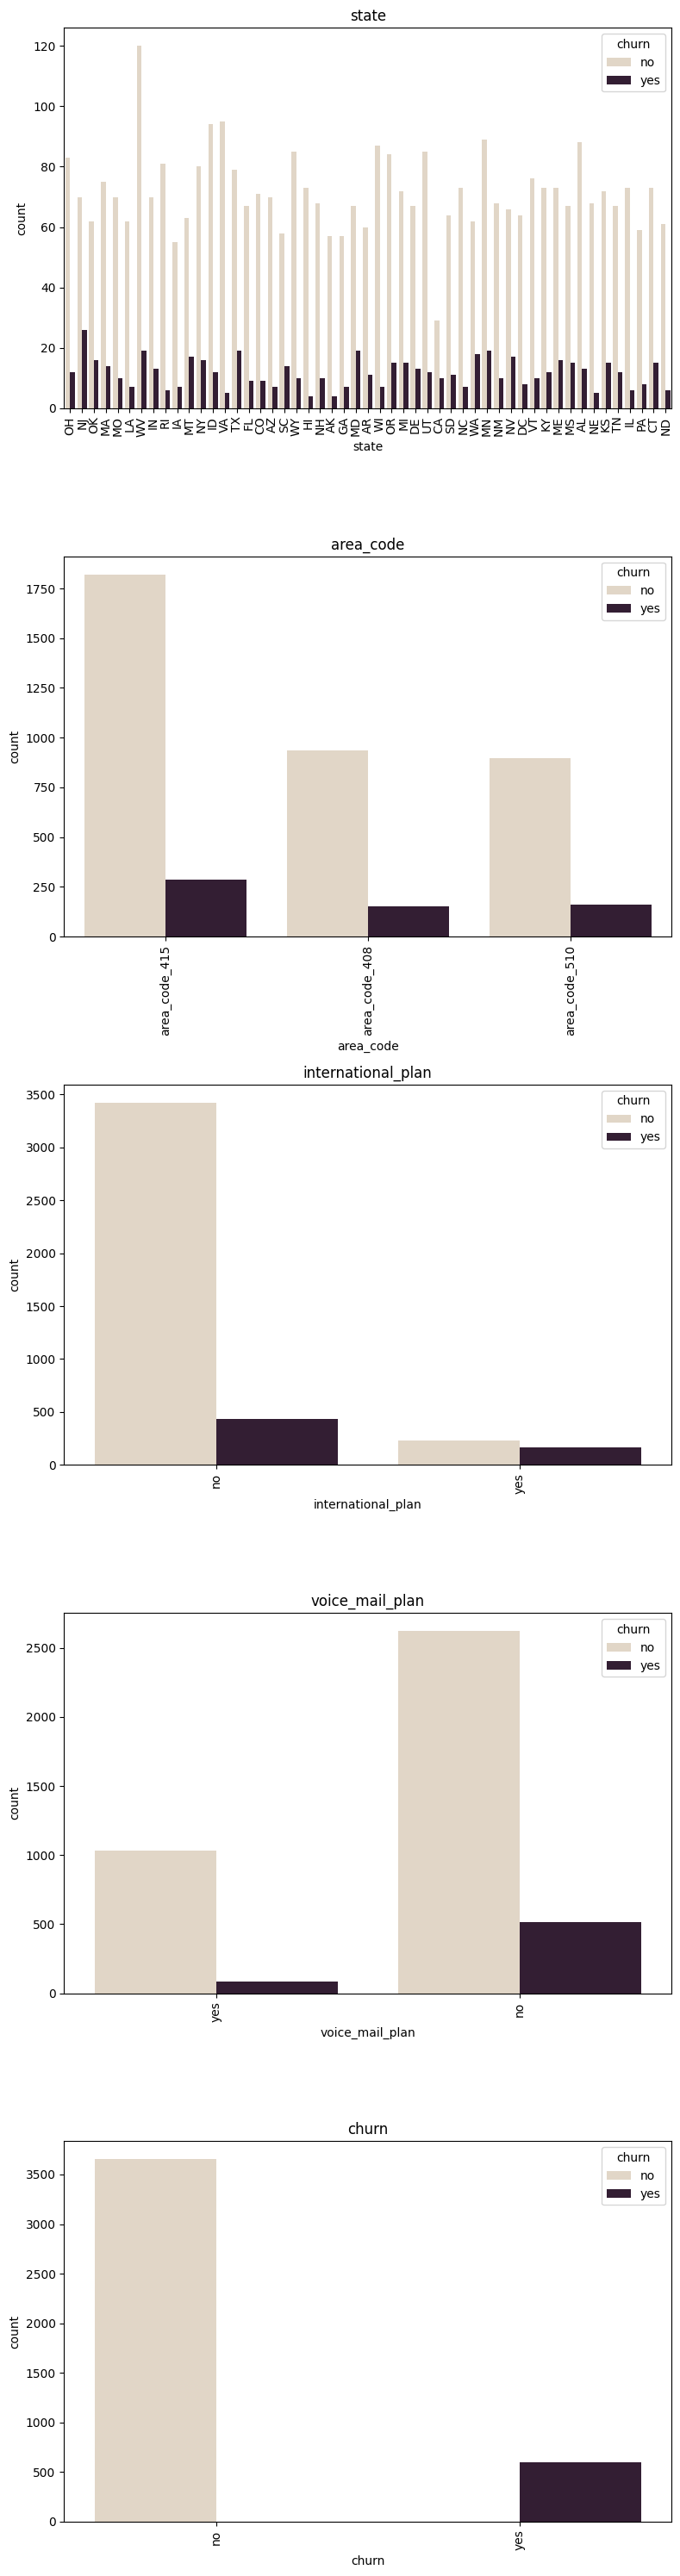

In [61]:
fig, axes = plt.subplots(len(cat_cols), 1, figsize=(8, 6 * len(cat_cols)))

for i, (c, ax) in enumerate(zip(cat_cols, axes)):
    sns.countplot(x=c, data=df_cleaned, ax=ax, palette=palette, hue='churn')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title(c)

plt.tight_layout()
plt.show()


In [62]:
df_cleaned['churn'].value_counts(normalize=True)

churn
no     0.859294
yes    0.140706
Name: proportion, dtype: float64

- There are only 3 area code, including 415, 408, and 510. 
- Most of the customer doesn't have an international plan. 
- Likewise, most customer doesn't have a voicemail plan. In addition, Customer without an international plan and voicemail package tend to churn out more.
- **We will kept in mind that our dataset are highly imbalanced, with the majority classes are not churn (85%).**

We will perform the following steps for cateogrical columns:

1. **Binary Encoding:** We'll perform binary encoding on 'international_plan', 'voice_mail_plan', and 'churn'. Since it's only have two unique values ('yes' and 'no').
- 'yes' - 1
- 'no' - 0

2. **One-hot Encoding:** For 'area_code' columns, since it hast three unique values, we will perform one-hot encoding techniques.

3. **State:** 'state' columns has 51 unique values, we need to decide how to handle them. Options include Target-encoding and Hash-encoding.

#### Binary Encoding

In [63]:
binary_mapping = {
    "yes": 1,
    "no": 0
}

In [64]:
df_cleaned['international_plan'] = df_cleaned['international_plan'].map(binary_mapping)
df_cleaned['voice_mail_plan'] = df_cleaned['voice_mail_plan'].map(binary_mapping)
df_cleaned['churn'] = df_cleaned['churn'].map(binary_mapping)

In [65]:
df_cleaned.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,MA,121,area_code_510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


#### One-hot Encoding

In [66]:
df_cleaned['area_code'] = df_cleaned['area_code'].apply(lambda x: int(x.split('_')[-1]))

In [67]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['area_code'])

In [68]:
df_cleaned['area_code_408'] = df_cleaned['area_code_408'].astype(int)
df_cleaned['area_code_415'] = df_cleaned['area_code_415'].astype(int)
df_cleaned['area_code_510'] = df_cleaned['area_code_510'].astype(int)

In [69]:
df_cleaned.head()

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_408,area_code_415,area_code_510
0,OH,107,0,1,26,161.6,123,27.47,195.5,103,...,103,11.45,13.7,3,3.70,1,0,0,1,0
1,NJ,137,0,0,0,243.4,114,41.38,121.2,110,...,104,7.32,12.2,5,3.29,0,0,0,1,0
2,OH,84,1,0,0,299.4,71,50.90,61.9,88,...,89,8.86,6.6,7,1.78,2,0,1,0,0
3,OK,75,1,0,0,166.7,113,28.34,148.3,122,...,121,8.41,10.1,3,2.73,3,0,0,1,0
4,MA,121,0,1,24,218.2,88,37.09,348.5,108,...,118,9.57,7.5,7,2.03,3,0,0,0,1


#### Hash Encoding

##### 'State'

Given that the 'state' column has 51 unique values, we have various choice between the Target Encoding and Hash encoding. Using a Target Encoding can capture the relationship between the categorical feature and the target variable, which can be valuable if there's a strong correlation. However, it's may end up with overfitting and lead to data leakage.


In [70]:
import category_encoders as ce

In [71]:
encoder=ce.HashingEncoder(cols='state')

In [72]:
df_cleaned = encoder.fit_transform(df_cleaned)

In [73]:
df_cleaned.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,international_plan,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_408,area_code_415,area_code_510
0,0,0,0,0,1,0,0,0,107,0,...,103,11.45,13.7,3,3.70,1,0,0,1,0
1,0,1,0,0,0,0,0,0,137,0,...,104,7.32,12.2,5,3.29,0,0,0,1,0
2,0,0,0,0,1,0,0,0,84,1,...,89,8.86,6.6,7,1.78,2,0,1,0,0
3,0,0,0,0,1,0,0,0,75,1,...,121,8.41,10.1,3,2.73,3,0,0,1,0
4,0,0,0,0,1,0,0,0,121,0,...,118,9.57,7.5,7,2.03,3,0,0,0,1


### Numerical Columns

In [74]:
num_cols

['account_length',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls']

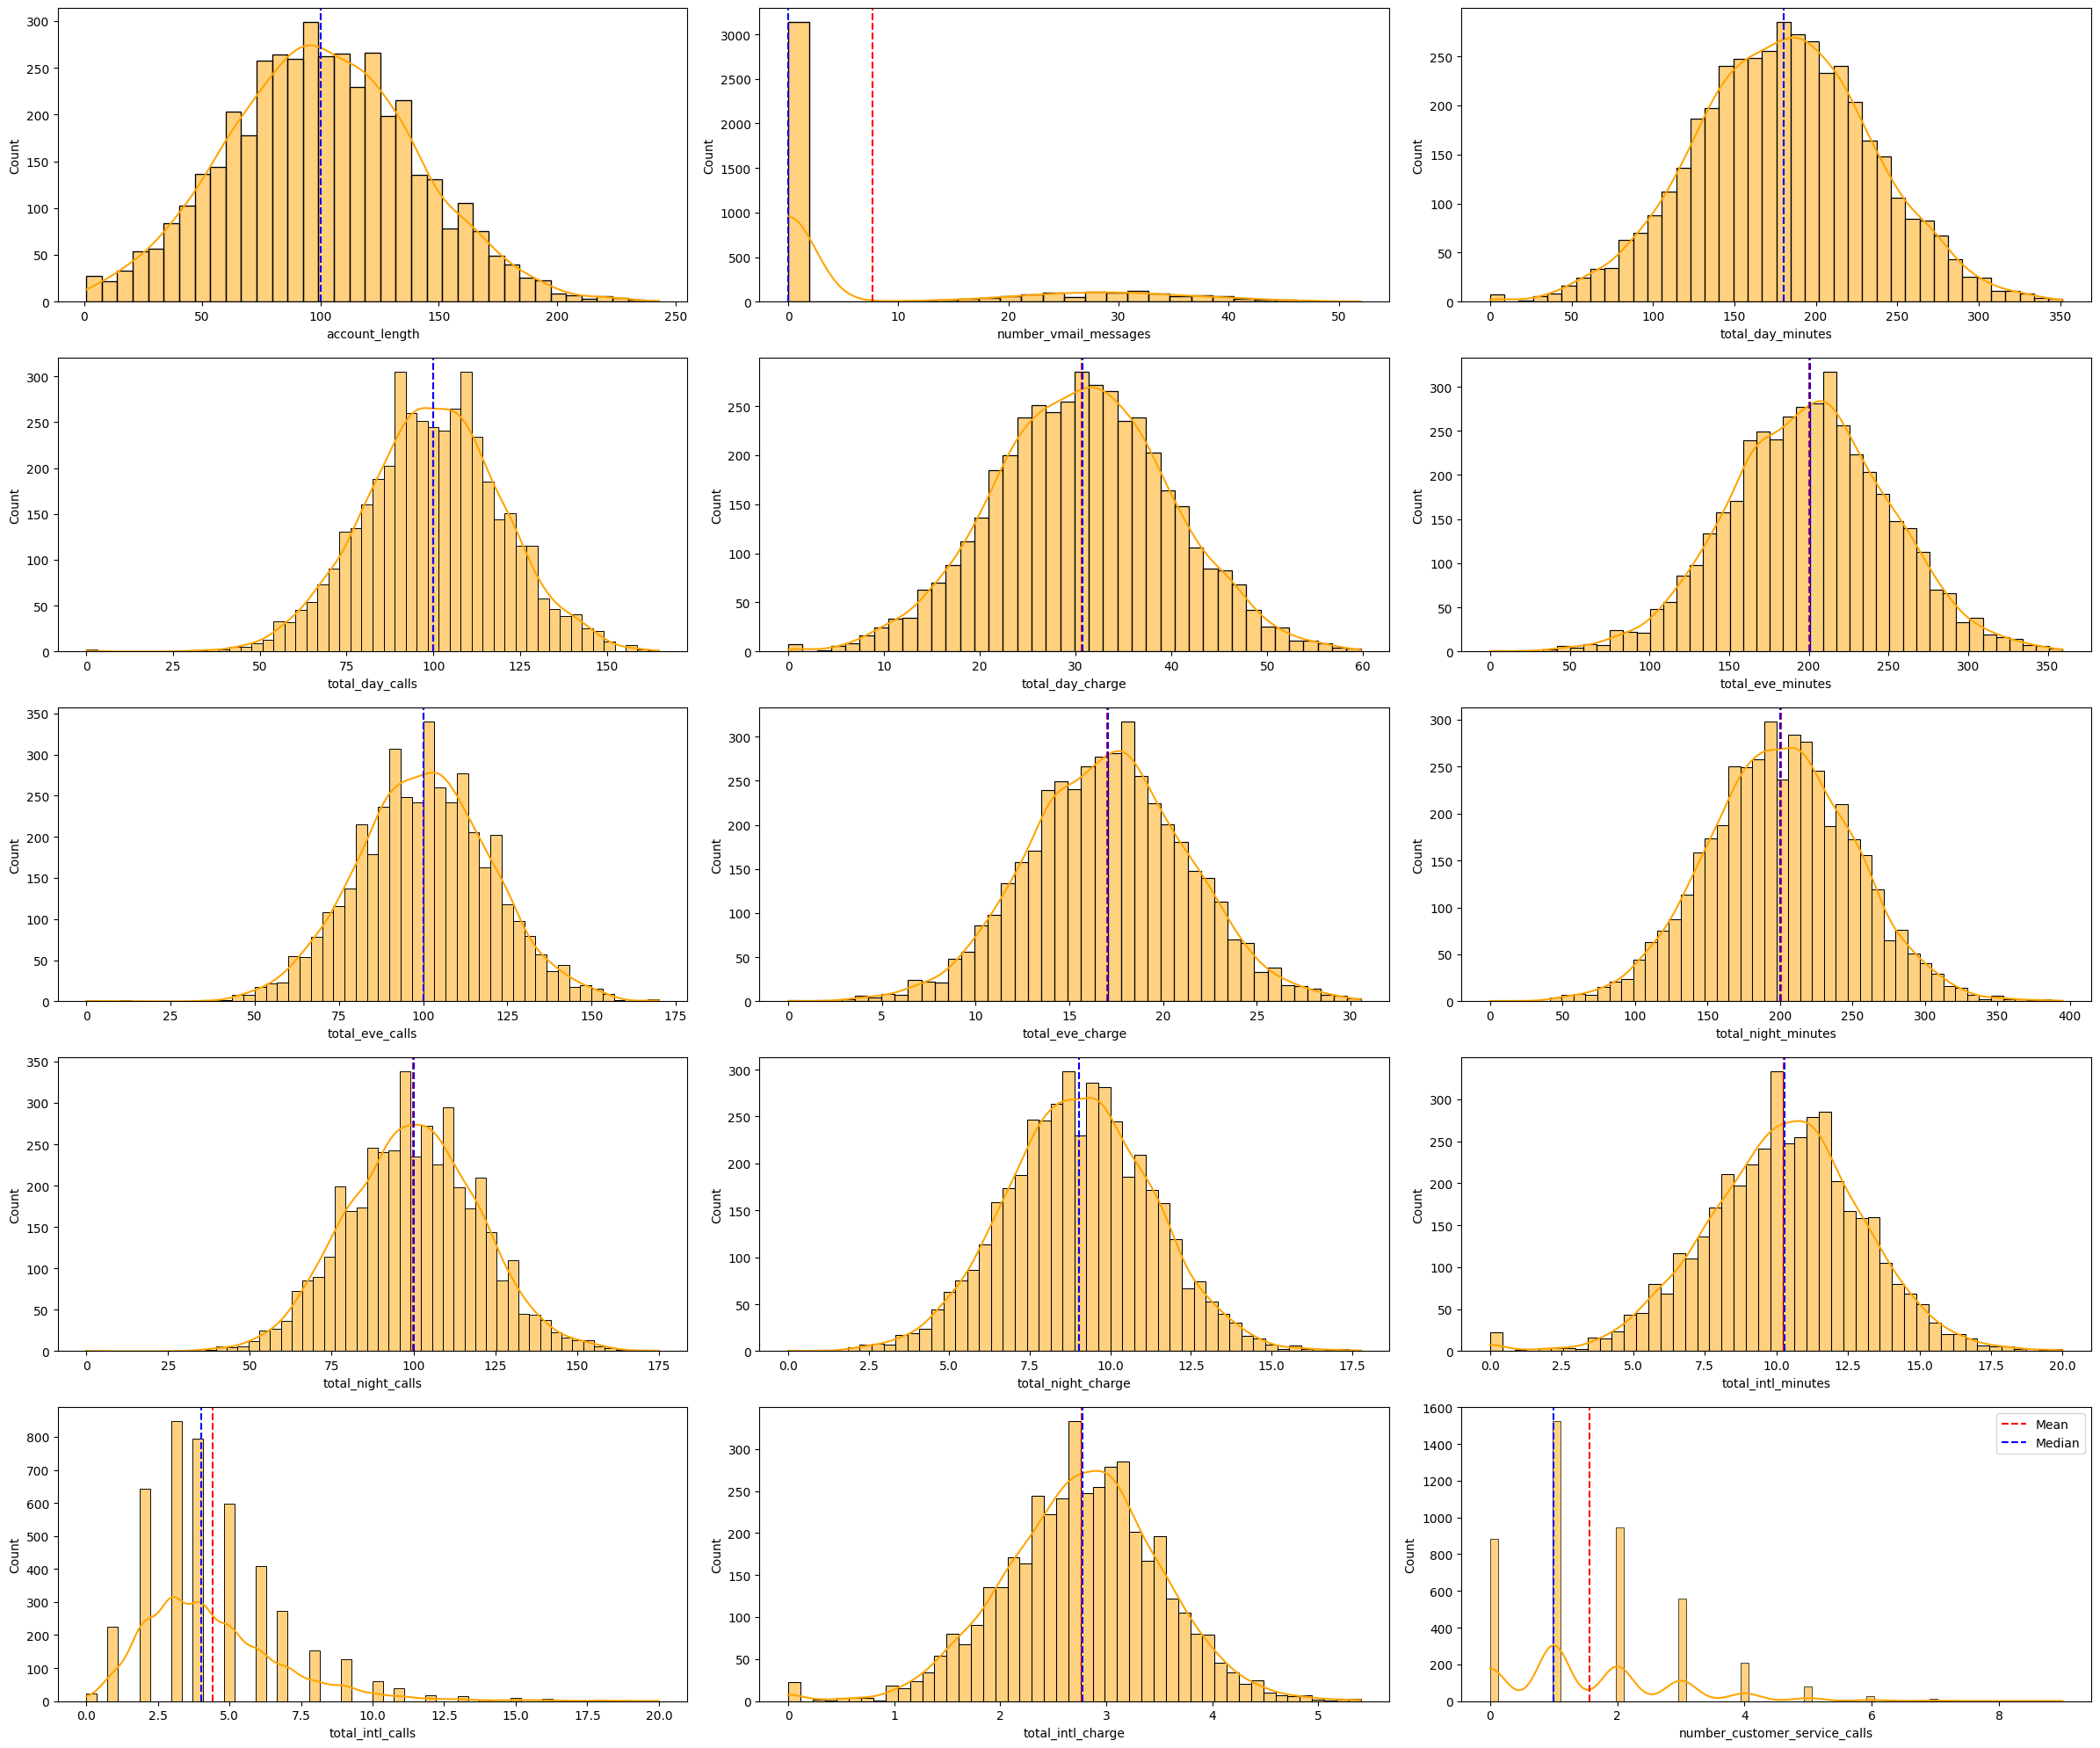

In [75]:
fig, axes = plt.subplots(5, 3, figsize=(24, 20))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(num_cols):
    sns.histplot(df_cleaned[c], ax=axes[i], kde=True, color='orange')
    
    mean = df_cleaned[c].mean()
    median = df_cleaned[c].median()
    
    axes[i].axvline(mean, color='red', linestyle='--', label='Mean')
    axes[i].axvline(median, color='blue', linestyle='--', label='Median')
    
plt.xlabel(num_cols[i])
plt.legend()
plt.tight_layout()
plt.show()

The histrogram plot can guide us in identifying the distribution of each feature, and it is evident that most columns correspond to the normal distribution except:
- **'number_vmail_messages:** Number of voice mail messages.
- **'total_int_calls:** Total number of international calls.
- **'number_custoemr_service_calls** Number of calls to the Customer Services of the provider.

#### Distribution of Numerical feature and Target variable

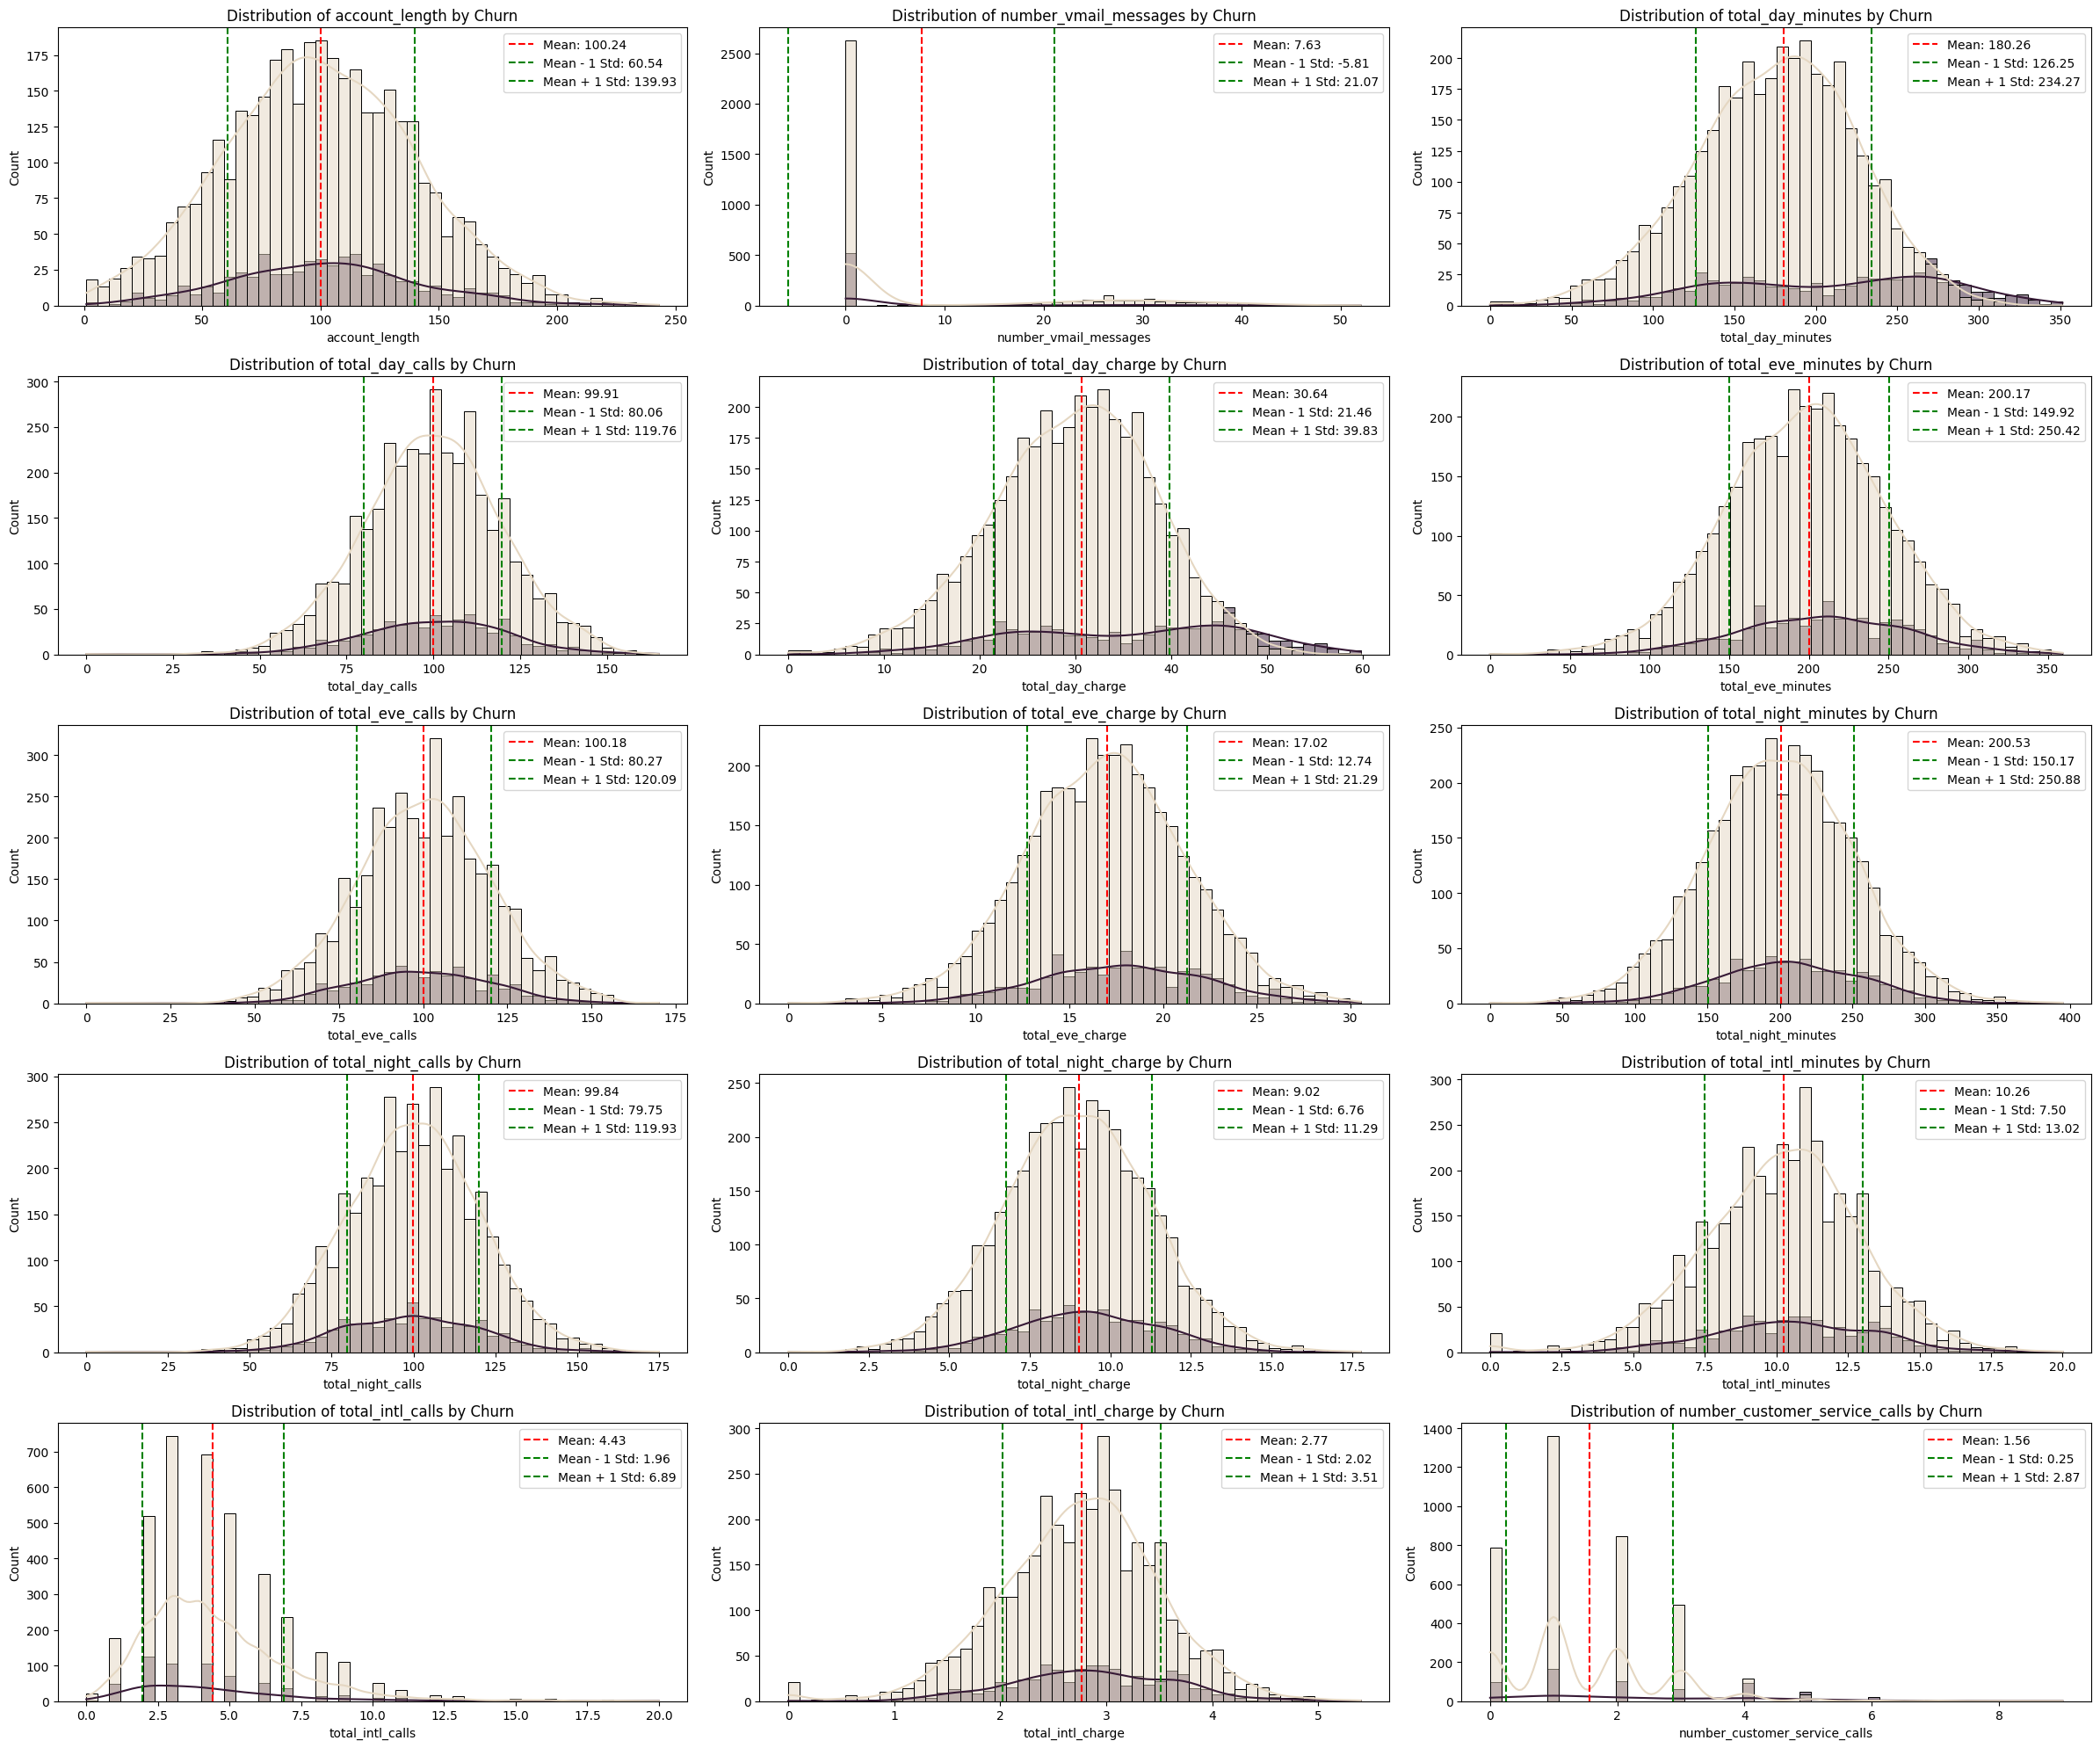

In [76]:
fig, axes = plt.subplots(5, 3, figsize=(24, 20))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(num_cols):
    sns.histplot(data=df_cleaned, x=c, hue='churn', ax=axes[i], kde=True, bins=50, palette=palette)
    
    mean = df_cleaned[c].mean()
    std = df_cleaned[c].std()
    
    axes[i].axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    axes[i].axvline(mean - std, color='green', linestyle='--', label=f'Mean - 1 Std: {mean - std:.2f}')
    axes[i].axvline(mean + std, color='green', linestyle='--', label=f'Mean + 1 Std: {mean + std:.2f}')
    
    axes[i].set_title(f'Distribution of {c} by Churn')
    axes[i].legend()

plt.tight_layout()    
plt.show()

We added the 68% confidence interval to the histogram and found the following insight:

- **account_length:** Customers who have an account length between 60.54 and 139.93 tend to churn.
- **number_vmail_messages:** Customers who don't have any voice mail messages (0) tend to churn.
- **total_day_minutes:** Customers who have a total of day call minutes between 126 and 234 tend to churn.
- **total_day_calls:** Customers who have a total number of day calls between 80 and 120 tend to churn.
- **total_day_charge:** Customers who have a total charge of day calls between 21 and 40 tend to churn.
- **total_eve_minutes:** Customers who have a total of evening call minutes between 150 and 250 tend to churn.
- **total_eve_calls:** Customers who have a total number of evening calls between 80 and 120 tend to churn.
- **total_eve_charge:** Customers who have a total charge of evening calls between 13 and 21 tend to churn.
- **total_night_minutes:** Customers who have a total of night call minutes between 150 and 251 tend to churn.
- **total_night_calls:** Customers who have a total number of night calls between 80 and 120 tend to churn.
- **total_night_charge:** Customers who have a total charge of night calls between 7 and 11 tend to churn.
- **total_intl_minutes:** Customers who have a total of international call minutes between 8 and 13 tend to churn.
- **total_intl_calls:** Customers who have a total number of international calls between 2 and 7 tend to churn.
- **total_intl_charge:** Customers who have a total charge of international calls between 2 and 3.5 tend to churn.
- **number_customer_service_calls:** Customers who have made calls to customer service between 0 and 3 tend to churn.



We will perform the following steps for numerical columns:

1. **Handling Outliers:** We'll analyze and handle any outliers present in the numerical columns. Imputing the outliers with the Median may be consider.

2. **Scaling:** We'll apply scaling techniques such as Standarization or Min-Max Scaling to ensure that all numerical features are on a same scale. 

3. **Feature Engineering:** We might create new features based on business knowledge or combination of existing features.

#### 1. Handling Outliers

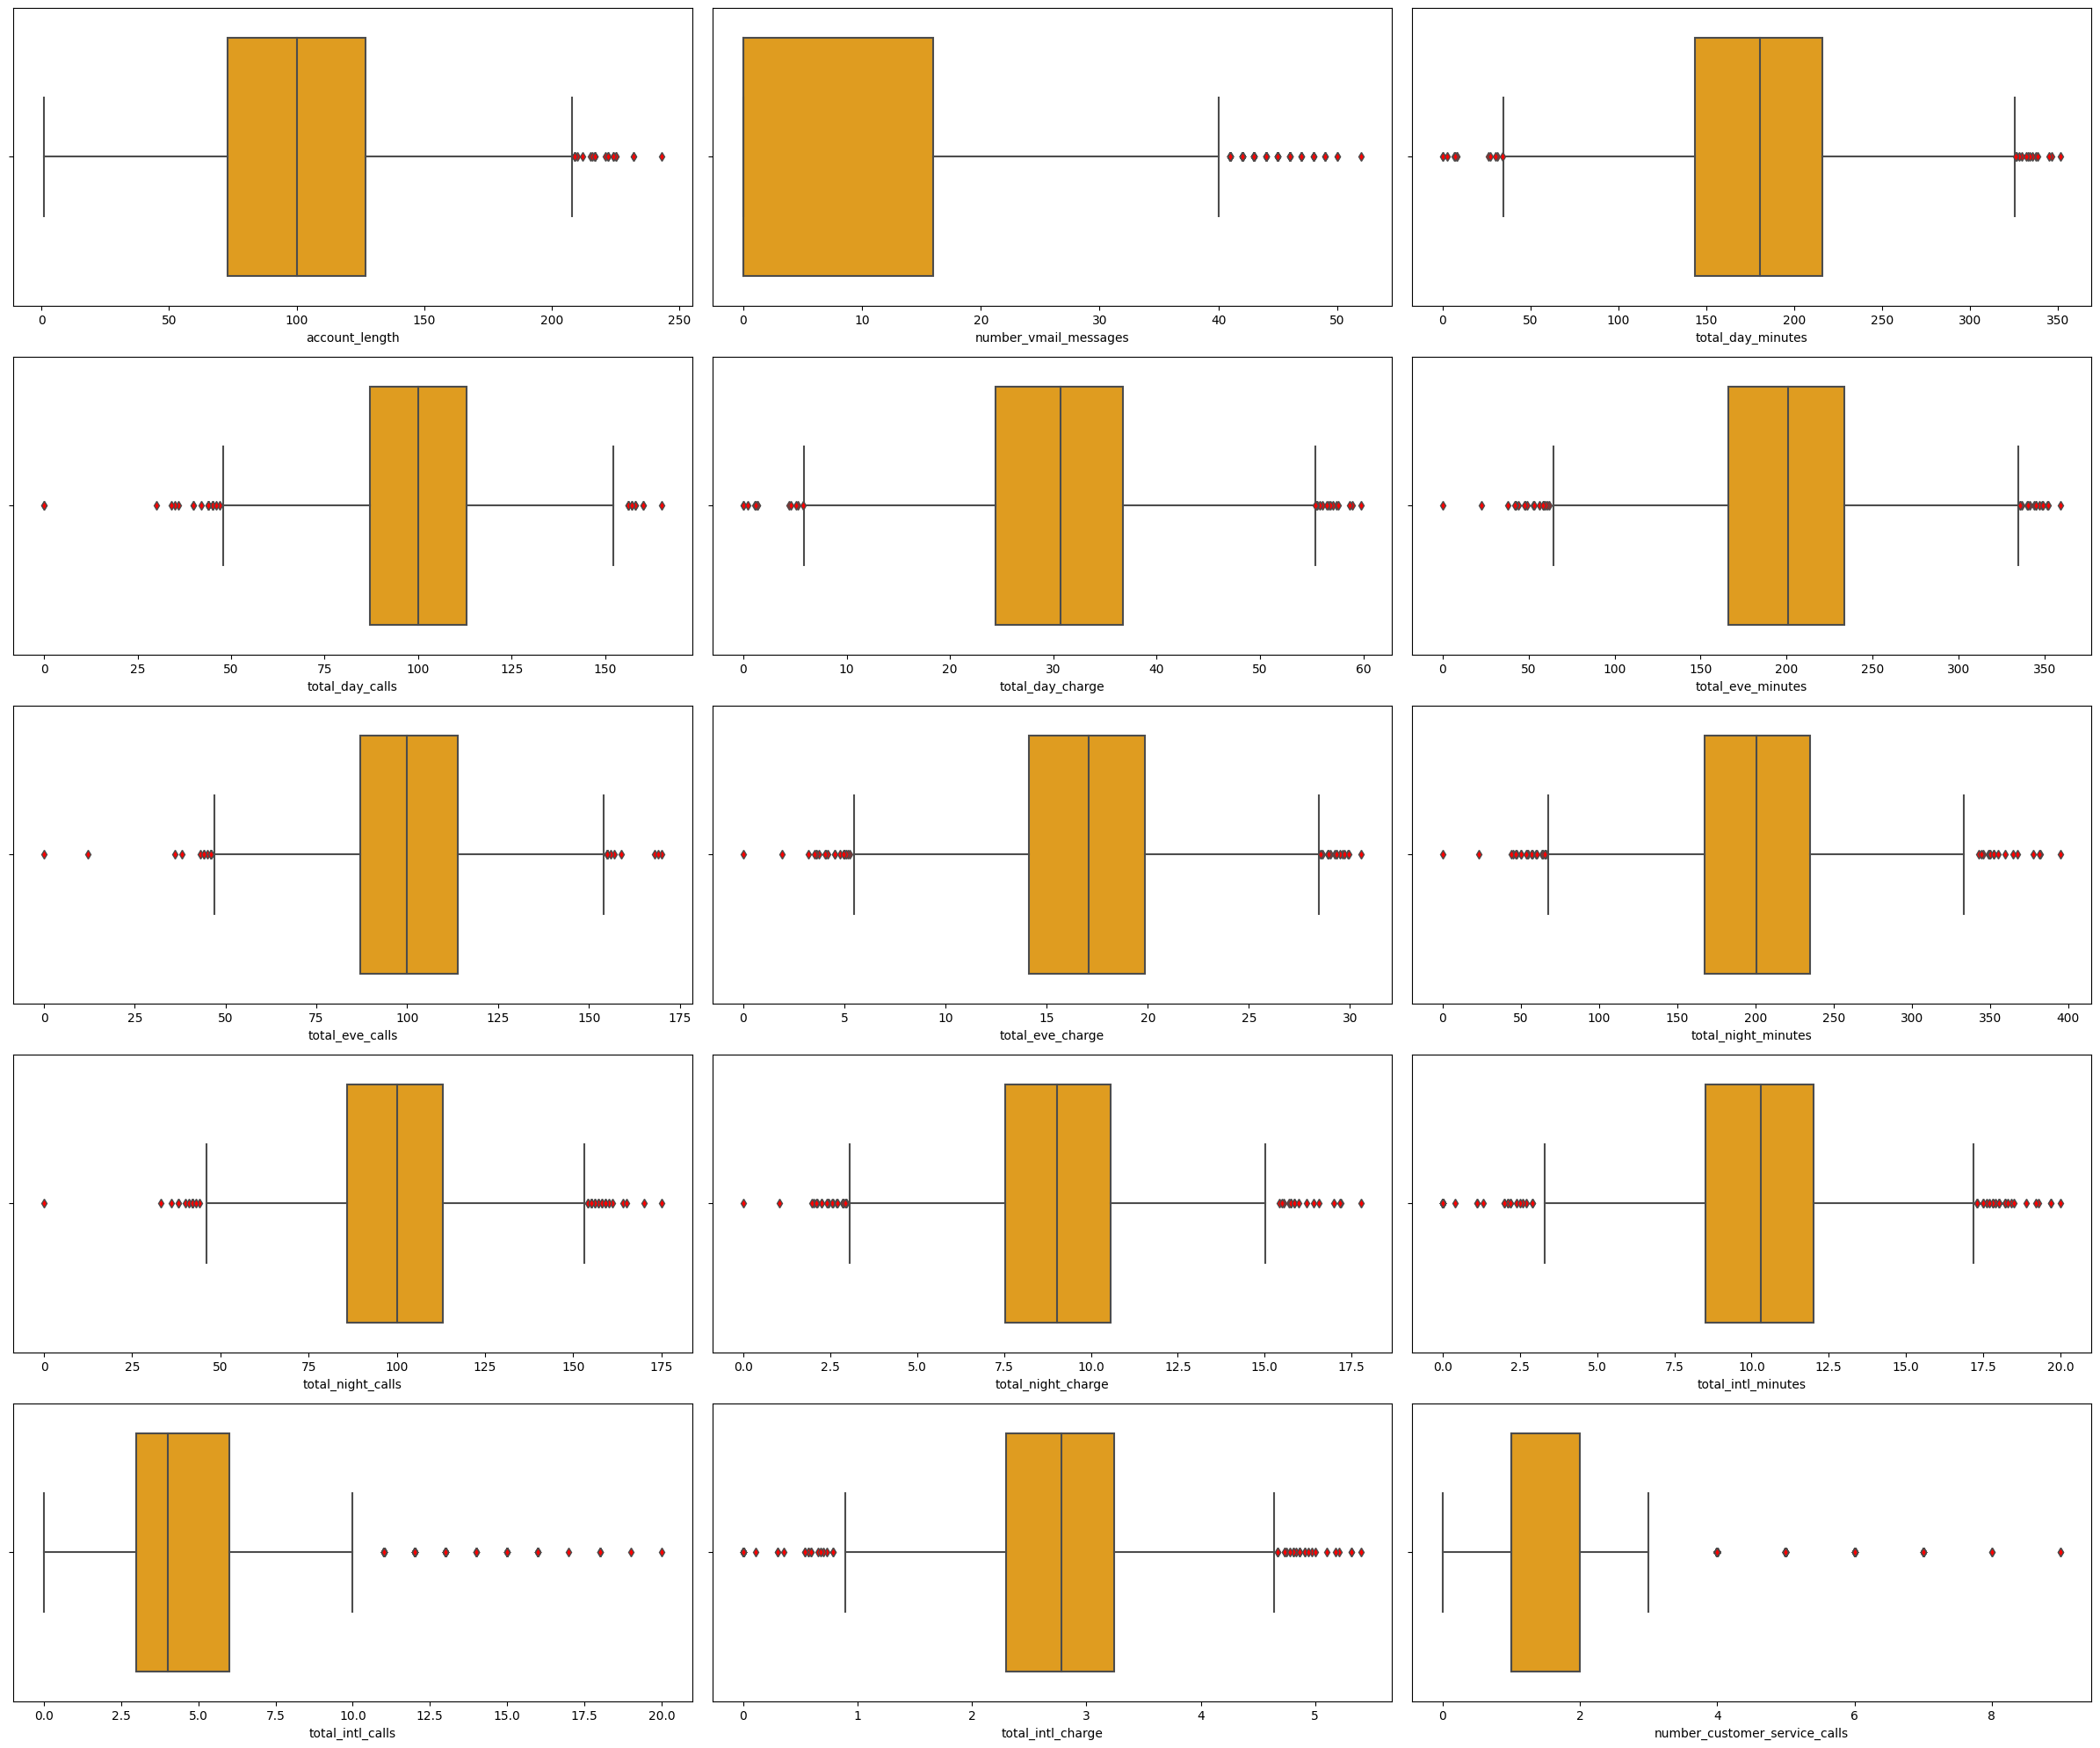

In [77]:
fig, axes = plt.subplots(5, 3, figsize=(24, 20))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(num_cols):
    sns.boxplot(data=df_cleaned, x=c, ax=axes[i], color='orange', flierprops=dict(markerfacecolor='red'))

plt.tight_layout()
plt.show()

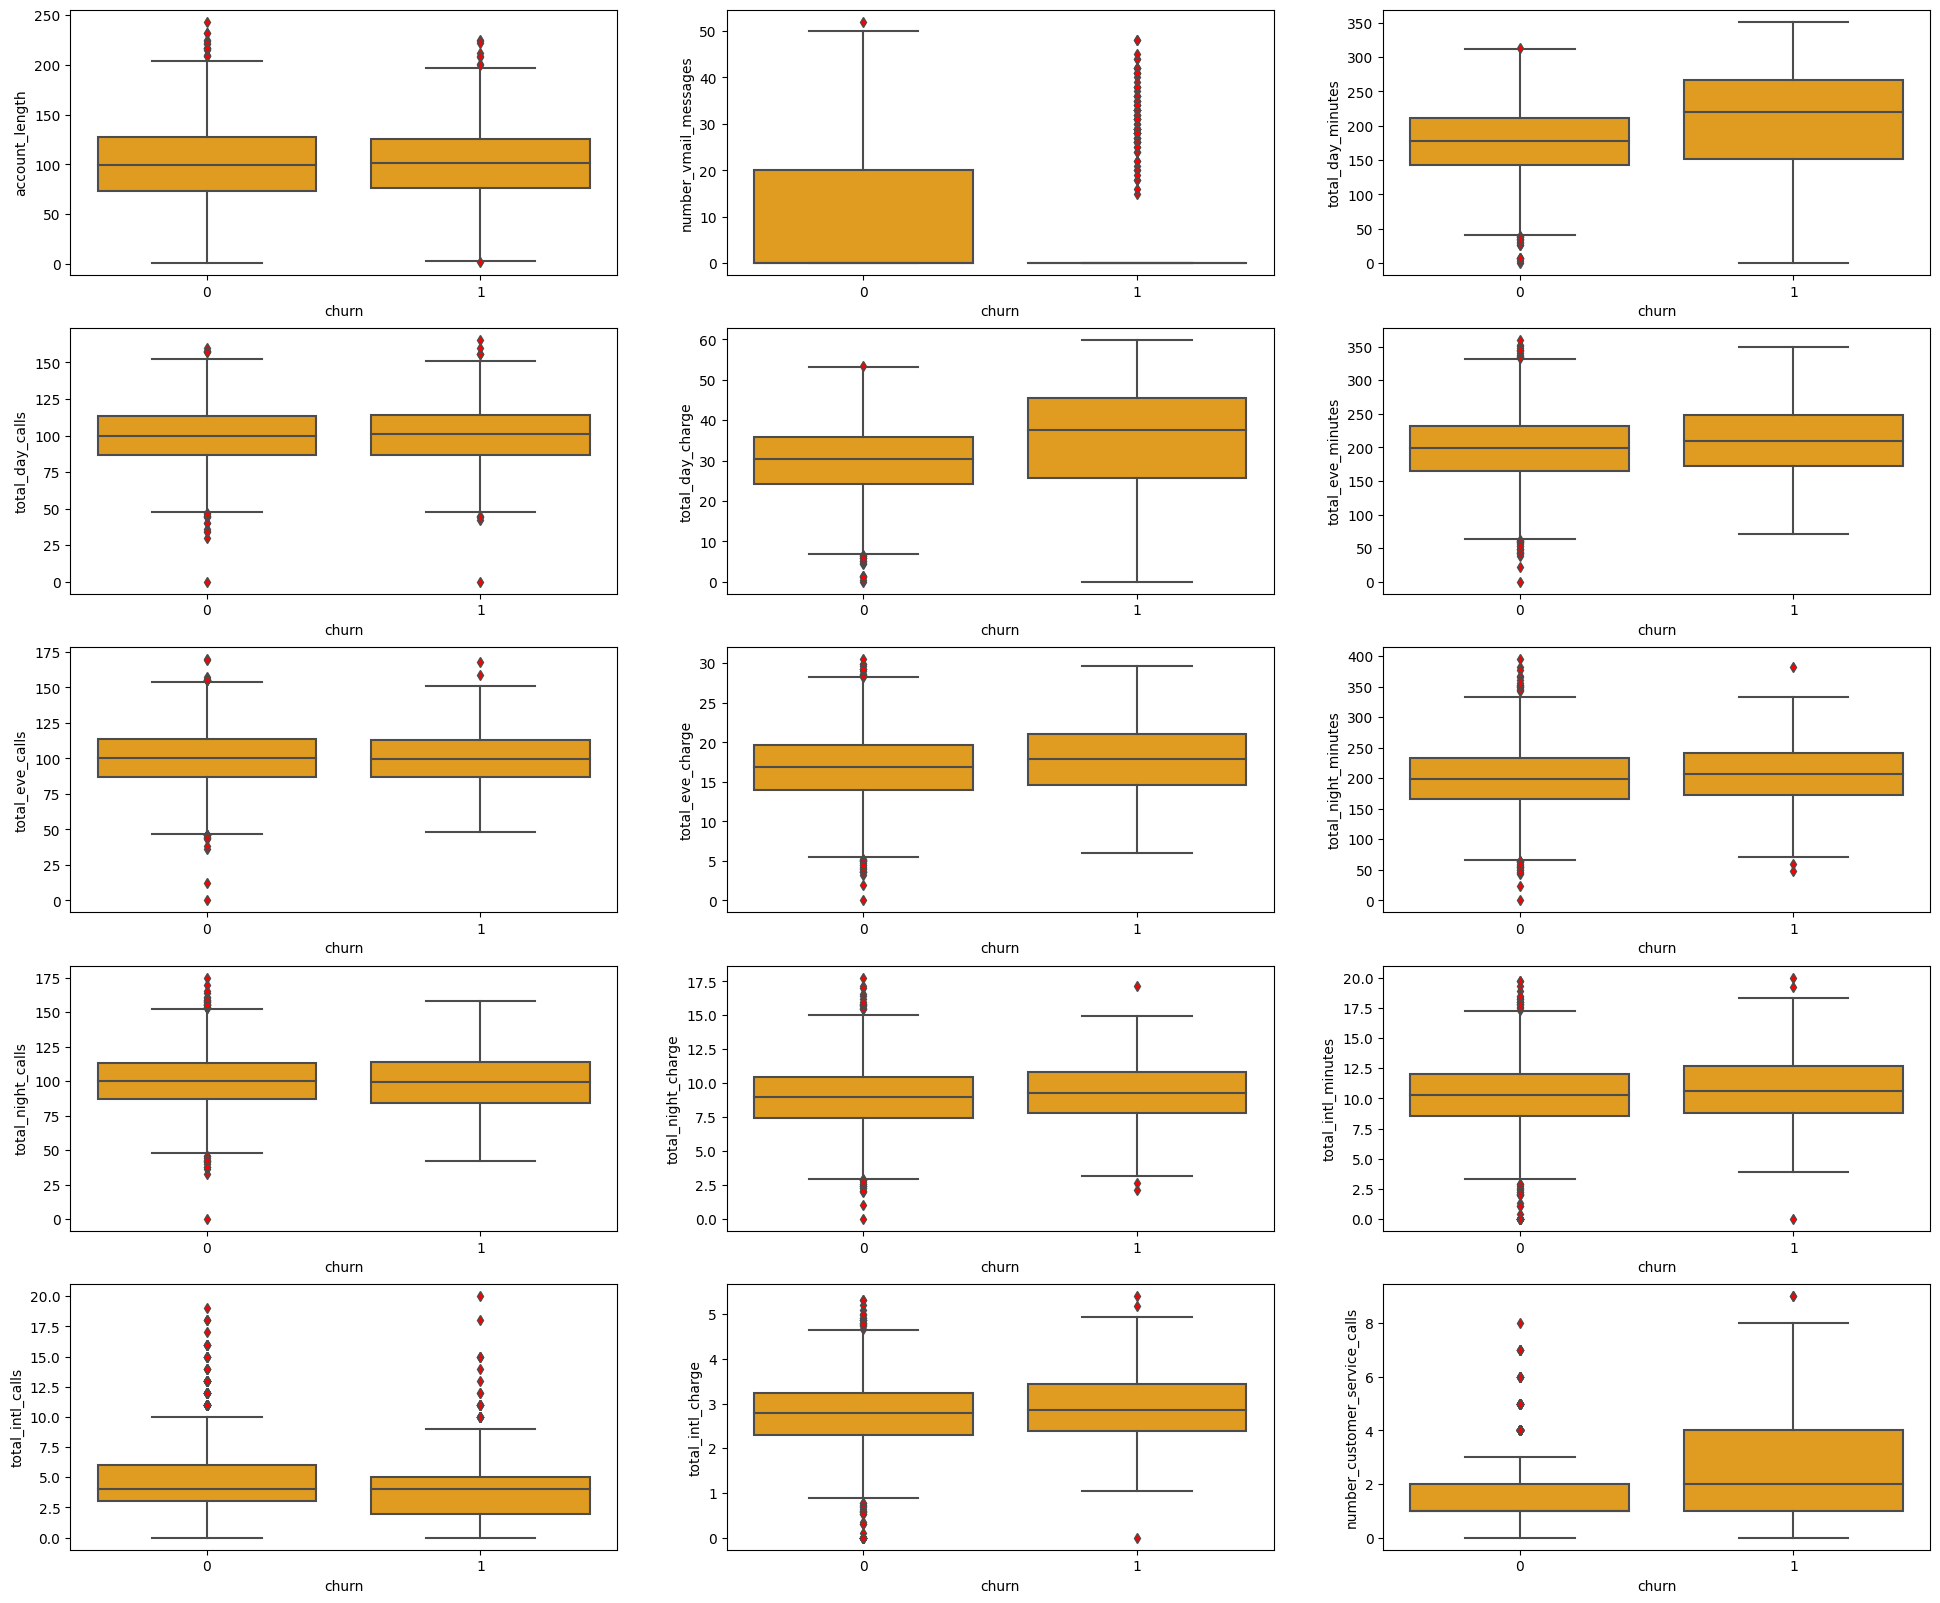

In [78]:
fig, axes = plt.subplots(5, 3, figsize=(24, 20))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(num_cols):
    sns.boxplot(data=df_cleaned, x='churn', y=c,ax=axes[i], color='orange', flierprops=dict(markerfacecolor='red'))
    
plt.show()

#### Replacing Outliers with Median

Most of our numerical columns follow a normal distribution, and we detected that all of the columns have outliers. We will impute the outliers with median rathern mean. Median is less sensitive to outliers compared to mean, making it more robust choice for impuration in the presence of outliers. Doing so will help maintain the overall distribution and central tendancy of the data. 

In [79]:
def replace_outlier(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median = column.median()
    column_replaced = column.apply(lambda x: median if x < lower_bound or x > upper_bound else x)
    
    return column_replaced

In [80]:
for col in num_cols:
    df_cleaned[col] = replace_outlier(df_cleaned[col])

In [81]:
df_cleaned.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,international_plan,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_408,area_code_415,area_code_510
0,0,0,0,0,1,0,0,0,107.0,0,...,103.0,11.45,13.7,3.0,3.70,1.0,0,0,1,0
1,0,1,0,0,0,0,0,0,137.0,0,...,104.0,7.32,12.2,5.0,3.29,0.0,0,0,1,0
2,0,0,0,0,1,0,0,0,84.0,1,...,89.0,8.86,6.6,7.0,1.78,2.0,0,1,0,0
3,0,0,0,0,1,0,0,0,75.0,1,...,121.0,8.41,10.1,3.0,2.73,3.0,0,0,1,0
4,0,0,0,0,1,0,0,0,121.0,0,...,118.0,9.57,7.5,7.0,2.03,3.0,0,0,0,1


We'll save our cleaned data into the folder data/processed

### 2. Scaling

We will perform scaling since we want to ensure that features were on the same scale. Therefore, we'll perform standard scaling only on the numerical columns.

In [82]:
from sklearn.preprocessing import StandardScaler
from joblib import dump

In [83]:
num_cols

['account_length',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls']

In [84]:
scaler_1 = StandardScaler()    

In [85]:
df_cleaned[num_cols] = scaler_1.fit_transform(df_cleaned[num_cols])

In [86]:
df_cleaned.describe()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,international_plan,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_408,area_code_415,area_code_510
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4.250000e+03,4250.000000,...,4.250000e+03,4.250000e+03,4.250000e+03,4.250000e+03,4.250000e+03,4.250000e+03,4250.000000,4250.000000,4250.000000,4250.000000
mean,0.159294,0.169412,0.076471,0.112235,0.161176,0.056941,0.167765,0.096706,-1.613350e-16,0.093176,...,4.514036e-17,1.805614e-16,5.751216e-16,-8.359326e-18,3.393886e-16,-5.015596e-18,0.140706,0.255529,0.496000,0.248471
std,0.365993,0.375159,0.265781,0.315693,0.367737,0.231757,0.373701,0.295592,1.000118e+00,0.290714,...,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,0.347759,0.436210,0.500043,0.432177
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.541450e+00,0.000000,...,-2.777731e+00,-2.754607e+00,-2.754710e+00,-2.048971e+00,-2.757016e+00,-1.361399e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.869654e-01,0.000000,...,-7.107318e-01,-6.805156e-01,-6.676893e-01,-5.915440e-01,-6.713626e-01,-2.952582e-01,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.466389e-03,0.000000,...,1.271813e-02,-4.506815e-03,1.732621e-03,-1.057349e-01,-4.529927e-04,-2.952582e-01,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.781414e-01,0.000000,...,6.844930e-01,6.818667e-01,6.711545e-01,3.800742e-01,6.704566e-01,7.708822e-01,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.790194e+00,1.000000,...,2.751493e+00,2.754807e+00,2.718798e+00,2.809120e+00,2.712355e+00,1.837023e+00,1.000000,1.000000,1.000000,1.000000


In [87]:
df_cleaned.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,international_plan,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_408,area_code_415,area_code_510
0,0,0,0,0,1,0,0,0,0.188764,0,...,0.167743,1.114881,1.340576,-0.591544,1.341366,-0.295258,0,0,1,0
1,0,1,0,0,0,0,0,0,0.961465,0,...,0.219418,-0.787617,0.749910,0.380074,0.743382,-1.361399,0,0,1,0
2,0,0,0,0,1,0,0,0,-0.403641,1,...,-0.555707,-0.078211,-1.455244,1.351692,-1.458952,0.770882,0,1,0,0
3,0,0,0,0,1,0,0,0,-0.635452,1,...,1.097893,-0.285505,-0.077023,-0.591544,-0.073378,1.837023,0,0,1,0
4,0,0,0,0,1,0,0,0,0.549358,0,...,0.942868,0.248853,-1.100845,1.351692,-1.094327,1.837023,0,0,0,1


In [88]:
scaler_2 = StandardScaler()

In [89]:
df_cleaned[num_cols] = scaler_2.fit_transform(df_cleaned[num_cols])

In [90]:
df_cleaned.describe()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,international_plan,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_408,area_code_415,area_code_510
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4.250000e+03,4250.000000,...,4.250000e+03,4.250000e+03,4.250000e+03,4.250000e+03,4.250000e+03,4.250000e+03,4250.000000,4250.000000,4250.000000,4250.000000
mean,0.159294,0.169412,0.076471,0.112235,0.161176,0.056941,0.167765,0.096706,4.179663e-19,0.093176,...,3.594510e-17,-1.086712e-17,-1.003119e-17,-8.359326e-18,-3.510917e-17,-3.176544e-17,0.140706,0.255529,0.496000,0.248471
std,0.365993,0.375159,0.265781,0.315693,0.367737,0.231757,0.373701,0.295592,1.000118e+00,0.290714,...,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,0.347759,0.436210,0.500043,0.432177
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.541450e+00,0.000000,...,-2.777731e+00,-2.754607e+00,-2.754710e+00,-2.048971e+00,-2.757016e+00,-1.361399e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.869654e-01,0.000000,...,-7.107318e-01,-6.805156e-01,-6.676893e-01,-5.915440e-01,-6.713626e-01,-2.952582e-01,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.466389e-03,0.000000,...,1.271813e-02,-4.506815e-03,1.732621e-03,-1.057349e-01,-4.529927e-04,-2.952582e-01,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.781414e-01,0.000000,...,6.844930e-01,6.818667e-01,6.711545e-01,3.800742e-01,6.704566e-01,7.708822e-01,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.790194e+00,1.000000,...,2.751493e+00,2.754807e+00,2.718798e+00,2.809120e+00,2.712355e+00,1.837023e+00,1.000000,1.000000,1.000000,1.000000


In [45]:
df_cleaned.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,international_plan,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_408,area_code_415,area_code_510
0,0,0,0,0,1,0,0,0,0.188764,0,...,0.167743,1.114881,1.340576,-0.591544,1.341366,-0.295258,0,0,1,0
1,0,1,0,0,0,0,0,0,0.961465,0,...,0.219418,-0.787617,0.749910,0.380074,0.743382,-1.361399,0,0,1,0
2,0,0,0,0,1,0,0,0,-0.403641,1,...,-0.555707,-0.078211,-1.455244,1.351692,-1.458952,0.770882,0,1,0,0
3,0,0,0,0,1,0,0,0,-0.635452,1,...,1.097893,-0.285505,-0.077023,-0.591544,-0.073378,1.837023,0,0,1,0
4,0,0,0,0,1,0,0,0,0.549358,0,...,0.942868,0.248853,-1.100845,1.351692,-1.094327,1.837023,0,0,0,1


In [49]:
dump(scaler, '../models/scaler.joblib')

['../models/scaler.joblib']

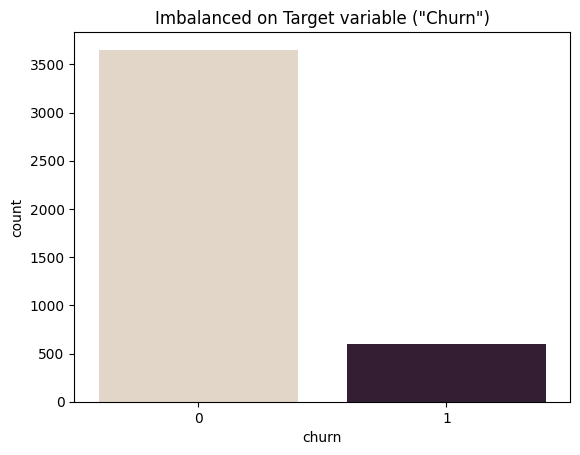

In [50]:
palette = 'ch:.25'

sns.countplot(x=df_cleaned['churn'], palette=palette)

plt.title('Imbalanced on Target variable ("Churn")')
plt.show()

In [53]:
df_cleaned.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,international_plan,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_408,area_code_415,area_code_510
0,0,0,0,0,1,0,0,0,0.188764,0,...,0.167743,1.114881,1.340576,-0.591544,1.341366,-0.295258,0,0,1,0
1,0,1,0,0,0,0,0,0,0.961465,0,...,0.219418,-0.787617,0.749910,0.380074,0.743382,-1.361399,0,0,1,0
2,0,0,0,0,1,0,0,0,-0.403641,1,...,-0.555707,-0.078211,-1.455244,1.351692,-1.458952,0.770882,0,1,0,0
3,0,0,0,0,1,0,0,0,-0.635452,1,...,1.097893,-0.285505,-0.077023,-0.591544,-0.073378,1.837023,0,0,1,0
4,0,0,0,0,1,0,0,0,0.549358,0,...,0.942868,0.248853,-1.100845,1.351692,-1.094327,1.837023,0,0,0,1


We will perform a Synethetic Minority Over-sampling Technique (SMOTE) since our target variable is imbalanced, with the majority of customer are not churn.

In [54]:
df_cleaned.to_csv('../data/processed/df_cleaned.csv', index=False)

### Split data into Training, Validation, and Testing set

We'll split the data into three set:
- Training(64%): Use to Train the model
- Validation:(16%) Use to tune the hyperparameter
- Testing(20%): Use to test the performance of the model after hyperparameter tuning.

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
df_cleaned = pd.read_csv('../data/processed/df_cleaned.csv')

In [75]:
y = df_cleaned.pop('churn')
X = df_cleaned

In [76]:
X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=8)

In [77]:
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, stratify=y_data, random_state=8)

### SMOTE

We'll perform SMOTE only the training set. We'll not apply SMOTE to the validation and testing sets because it could introdcue data leakage and lead to overly optimistic evaluation results.

In [78]:
from imblearn.over_sampling import SMOTE

In [79]:
y_train.value_counts(normalize=True)

churn
0    0.859559
1    0.140441
Name: proportion, dtype: float64

In [80]:
smote = SMOTE(random_state=8)

In [81]:
X_train, y_train = smote.fit_resample(X_train, y_train)

In [82]:
dump(smote, '../models/y_train_smote.joblib')

['../models/y_train_smote.joblib']

In [83]:
X_train.to_csv('../data/processed/SMOTE/X_train.csv', index=False)
y_train.to_csv('../data/processed/SMOTE/y_train.csv', index=False)
X_val.to_csv('../data/processed/SMOTE/X_val.csv', index=False)
y_val.to_csv('../data/processed/SMOTE/y_val.csv', index=False)
X_test.to_csv('../data/processed/SMOTE/X_test.csv', index=False)
y_test.to_csv('../data/processed/SMOTE/y_test.csv', index=False)    

#### Class weight = balanced

After perform SMOTE, I found that the performance of the model is not satisfactory on the validation set, I will consider reverting to the original dataset without sampling and use the "class_weight='balanced'" parameter while fitting the model.

In [84]:
df_cleaned = pd.read_csv('../data/processed/df_cleaned.csv')

In [85]:
y = df_cleaned.pop('churn')
X = df_cleaned

In [86]:
X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=8)

In [87]:
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, stratify=y_data, random_state=8)

In [88]:
X_train.to_csv('../data/processed/X_train.csv', index=False)
y_train.to_csv('../data/processed/y_train.csv', index=False)
X_val.to_csv('../data/processed/X_val.csv', index=False)
y_val.to_csv('../data/processed/y_val.csv', index=False)
X_test.to_csv('../data/processed/X_test.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)    